# 1. Using Momentum to Speed Up Training
We will now take a look at one of the most effective methods at improving plain gradient descent, called **momentum**. This can be thought of as the 80% factor to improve your learning procedure. 

A way to think of this is as follows: Gradient descent without momentum requires a *force* or *push* each time we want to get the weights to move. In other words, each time we want to move, there has to a be a gradient so that we can move in the direction of the gradient. If we had **momentum**, we can imagine that our update could keep moving, even without the gradient being present. 

This can be thought of as pushing a box on ice vs. pushing a box on gravel. If we are pushing the box on gravel, the minute we stop applying force, the box will also stop moving. This is analogous to gradient descent without momentum. However, if we were pushing the box on ice we could and then let go and it would continue moving for a period of time, before stopping. This is analogous to gradient descent with momentum. Another way to phrase this is as follows:
> With momentum included in our update, our weight vector will build up a velocity in any direction that has a *consistent gradient*.

Let's put this into math. 

## 1.1 Gradient Descent, *without* Momentum
Our update for $\theta$ can be described as:
#### $$\theta_t \leftarrow \theta_{t-1} - \eta g_{t-1}$$
This says that $\theta_t$ is equal to the previous value of $theta$, minus the learning rate, times the gradient $g_t$. From this we can see that if the gradient is 0, nothing will happen to $\theta_t$. It just gets updated to it's old value and doesn't change. 

## 1.2 Gradient Descent, *with* Momentum
Now let's say that we add in **momentum**. Note that the term momentum is used very loosely here, since it has nothing to do with actual physical momentum. What we do is create a new variable, $v$, which stands for the velocity. It is equal to $\mu$ (the momentum term) times its old velocity, minus the learning rate times the gradient. Notice that now, the gradient only directly influences the velocity, which in turn has an effect on the position (our weight vector), $\theta$. 

#### $$v_t \leftarrow \mu v_{t-1} - \eta g_{t-1}$$

This new term, $\mu v_{t-1}$, gives us the ability to "slide on ice" if you will. In other words, it allows us to continue to move in the same direction that we were going before. Now, we talked about how if a box is sliding on ice, it will still stop eventually. That means that we are going to want our updated $v$ to be a fraction of the prior $v$, and hence $\mu$ should be a fraction. Typical values of $\mu$ are 0.9, 0.95, 0.99, etc. This means that without any $g$, the equation will still eventually "slow down". Our update rule for $\theta_t$ then becomes:

#### $$\theta_t \leftarrow \theta_{t-1} + v_t$$

Now, if we combine these two equations we can see that our total update rule is:

#### $$\theta_t \leftarrow \theta_{t-1} + \mu v_{t-1} -\eta g_{t-1} $$

And we can see that if we set the momentum term, $\mu$, equal to zero, we end up with the same update rule we originally had for gradient descent. 

## 1.3 The Effect of Momentum
You may be wondering, what is the effect of using momentum? Well we can see below that by using momentum, the cost converges to its minimum value much faster. This significantly speeds up training! 

<img src="images/momentum.png">

From another perspective, we can think of a situation where we have unequal gradients in different directions. In the image below, we have a very large gradient that creates the valley (each side is very steep), and then in the other direction (the stream flowing down), it is a very small gradient. 

<img src="images/large-small-gradient.png">

For visualization purposes, lets assume we have 2 parameters to optimize: the vertical and horizontal parameter. The gradient in one direction is very steep, and the gradient in the other direction is very shallow. The idea is that if you don't have momentum, then you rely purely on the gradient, which points more in the steep direction than in the shallow direction-this is just a property of the gradient, it is the direction of steepest descent. Since this gradient vector points more in the steep direction, we are going to zigzag back and forth across the valley. That is a very inefficient way of reaching the minimum. 

<img src="images/contours-momentum.png">

Once we add momentum, however, things change. Because in the shallow direction, we move in the same direction every time, those velocities are going to accumulate, so we will have a portion of our old velocity, added to our new velocity to help us along in that direction. The result is that we get there faster by taking bigger steps in the shallow direction of the gradient. 

---
<br></br>
# 2. Nesterov Momentum
Nesterov momentum was coined by **Y Nesterov** in 1983. It is described as:
> "A method for unconstrained convex minimization problem with rate of convergence O(1/$k^2$)"

The core idea is that when the current weight vector is at some position, lets say $w$, then looking at original momentum update from earlier, we know that the momentum term alone (ignoring the term with the gradient), is about to nudge the parameter vector by $\mu v_{t-1}$. Therefore, if we are about to compute the gradient, we can treat the future approximate position of $w$, $w + \mu v_{t-1}$, as a "lookahead" - as in this is a point in the vicinity of where we are going to end up. Hence, it makes sense to compute the gradient at the $w + \mu v_{t-1}$, instead of the old/stale position $w$. 

<br></br>
<img src="images/nesterov-vs-normal.png">

The image above makes it clear that instead of evaluating the gradient at the current position of $w$, (red circle), we know that our momentum is about to carry us to the tip of the green arrow. With Nesterov momentum we therefore instead evaluate the gradient at this "looked-ahead" position. Also, keep in mind that in the image above the blue vector is referring to our update to the velocity, $v_t$, and not to the update of $w_t$. 

Okay, so we have a basic idea of **nesterov momentum** now, but let's just try and reiterate from a few different perspectives, to help is sink in. So, instead of just using momentum to blindly keep going in the direction that we were already going, let's instead peak ahead, by taking a big jump in the direction of the previous velocity, and calculate the gradient from there. We can think of it as though you are gambling, and if you are going to gamble it is better to take a big jump and then make a correction, than to make a correction and then gamble. 

<img src="images/nesterov1.png">

So first we peak ahead, jumping in the direction of the previous velocity (accumulated gradient): 

<img src="images/nesterov2.png">

We then measure the gradient, and go downhill in the direction of the gradient. We use that gradient to update our velocity (accumulated gradient). In other words, we combine the big jump with our gradient to get the accumulated gradient. So in a way, its peaking ahead and then course correcting based on where we would have ended up. 

<img src="images/nesterov3.png">

We then take that accumulated gradient (first green vector), multiply by some momentum constant, $\mu$, and then we take the next big jump in the direction of that accumulated gradient. Again, at the place where we end up (head of second brown vector), we measure the gradient, we go downhill (second red vector) to correct any errors we have made, and we get a new accumulated gradient (second green vector)

We can see that the blue vectors represent where we would go if we were using standard momentum, where we first measure the gradient where it currently is (small blue vector), and it adds that to the brown vector, and ends up making a jump by the big blue vector (first brown vector plus small blue vector, i.e. the current gradient). The brown vector represents our peak ahead value. Notice that it is in the same direction as the blue vector. The red vector is the gradient at the peak ahead value. The green vector is just the vector of the brown vector and the red vector. 

---
<br></br>
## 2.1 Nesterov Equations
So, with the visuals discussed, what do the equations look like? First, we are going to use $w$ to represent our weights instead of $\theta$. Also, the majority if this is looking at how we will update $v_t$, and the last step covers $w_t$. Now, lets start with the vector that represents the previous value of our weights, $w_{t-1}$, and the previous velocity, $v_{t-1}$:

<img src="images/nesterov-eq-1.png">

Now, we have this jump ahead, which we can call $w'_{t-1}$. We can also think of it as just our previous weight position, plus the momentum step. It is in the same direction of our previous velocity vector (because remember, the first part of updating $v_t$ was the term $\mu v_{t-1}$, but it is slightly smaller since the jump is scaled by $\mu$:

<img src="images/nesterov-eq-2.png">

#### $$look \; ahead\; value: \; w'_{t-1} = w_{t-1} +\mu v_{t-1}$$
#### $$look \; ahead\; value: \; w'_{t-1} = v_{t-1} +\mu v_{t-1}$$

The above equations are equivalent because both $w_{t-1}$ and $v_{t-1}$ both have the same position (head each vector). Also, note that as seen in the image above, the jump ahead is just the previous value of the velocity (or previous weight position, $w_{t-1}$), plus the momentum term multiplied by the previous velocity. Next, we calculate the gradient at this jump ahead point, and then use that to update $v$:

<img src="images/nesterov-eq-3.png">

<img src="images/nesterov-eq-4.png">

#### $$v_t \leftarrow \mu v_{t-1} - \eta \nabla J(w'_{t-1})$$

Which is equal to:

#### $$v_t \leftarrow \mu v_{t-1} - \eta \nabla J(w_{t-1} +\mu v_{t-1})$$

And then the last step is to update $w_t$, the accumulated gradient, which is the same as it was for standard momentum:

<img src="images/nesterov-eq-5.png">

#### $$w_t \leftarrow w_{t-1} + v_t$$

The main difference to note is that in the standard method we are taking the gradient from the current position of $w$, and also making our momentum step from the current position of $w$, whereas in the Nesterov method we first take our momentum step from the current position of $w$, then correct by taking the gradient from that position. For a great link that goes over this topic in more detail, checkout out the follow: http://cs231n.github.io/neural-networks-3/

---
<br></br>
## 2.3 Reformulation
However, in practice, this is not how nesterov momentum is usually implemented. Instead, we will reformulate the equations. Let's try and express everything only in terms of $w'$, our lookahead value of $w$, and it is where we want to calculate the gradient from. So, we can define $w'_t$ and $w'_{t-1}$ using the same definition:
### 2.3.1 Redefine in terms of $w'$
#### $$w'_t = w_t + \mu v_t$$
#### $$w'_{t-1} = w_{t-1} + \mu v_{t-1}$$

In other words, these are the lookahead values of $w$ at two consecutive steps. The second equation is seen in the below: 

<img src="images/nesterov-eq-6.png">

So, remember, the look ahead value can just be thought of as the step in the direction of the previous velocity, from the current weight vector postion. Next lets recall our updates for $v$ and $w$.

### 2.3.2 Recall updates for $v$ and $w$
#### $$v_t = \mu v_{t-1} - \eta \nabla J(w'_{t-1})$$
#### $$w_t = w_{t-1} + v_t$$

From here we can substitute $w'$ for $w$

### 2.3.3 Substitute $w'$ for $w$
#### $$w'_t - \mu v_t = w'_{t-1} - \mu v_{t-1} + v_t$$

### 2.3.4 Combine like terms on the right
#### $$w'_t = w'_{t-1} -\mu v_{t-1} + (1 + \mu)v_t$$

### 2.3.5 Get rid of $v_t$ term 
We can get ride of the $v_t$ term on the right by replacing it with an expression in terms of $v_{t-1}$. 
#### $$w'_t = w'_{t-1} - \mu v_{t-1} + (1+\mu) \Big[\mu v_{t-1} - \eta \nabla J (w'_{t-1})\Big]$$

### 2.3.6 Combine like terms, arrive at Nesterov momentum update
#### $$w'_t = w'_{t-1} + \mu^2 v_{t-1} - (1+\mu)\eta \nabla J (w'_{t-1})$$
This equation is the one that you will most often see when people are discussing nesterov momentum. 

---
<br></br>
## 2.4 Regular vs. Nesterov Momentum
So, to quickly recap, the equation for **regular momentum** is: 

#### $$w_t = w_{t-1} + \mu v_{t-1} - \eta \nabla J (w_{t-1})$$

And **Nesterov Momentum** is defined as:

#### $$w'_t = w'_{t-1} + \mu^2 v_{t-1} - (1+ \mu) \eta \nabla (w'_{t-1})$$

We can see that they each have a similar form. There is a previous $w$ term, a previous velocity term, and a previous gradient term. And if we take the nesterov equation, and plug phrase our $w'_t$ update in terms of $v_t$, we can see that the equations have an even greater resemblance:

#### $$v_t = \mu v_{t-1} - \eta \nabla J (w'_{t-1})$$
#### $$w'_t = w'_{t-1} + \mu v_t - \eta \nabla J (w'_{t-1})$$

The question may arise, why is this useful? What is the point of all of this algebraic manuipulation? Well, we have expressed the nesterov momentum update entirely in terms of all the look ahead $w'$s, so the actual non look ahead $w$s are never needed. We can just treat $w$, whatever it may be, as if they were the lookahead values. In other words, lets just drop the prime symbols!

#### $$v_t = \mu v_{t-1} - \eta \nabla J (w_{t-1})$$
#### $$w_t = w_{t-1} + \mu v_t - \eta \nabla J (w_{t-1})$$

So we can see that similar to regular momentum, we just proceed in two steps. 
1. First we calculate the new $v$ from the old $v$ and the gradient
2. Then we update $w$ using the new $v$

---
<br></br>
## 2.5 Conclusion 
The final updates for **regular momentum** are:
#### $$v_t \leftarrow \mu v_{t-1} - \eta \nabla J(w_{t-1})$$
#### $$w_t \leftarrow w_{t-1} + v_t$$

And for **nesterov momentum**:
#### $$v_t = \mu v_{t-1} - \eta \nabla J (w_{t-1})$$
#### $$w_t = w_{t-1} + \mu v_t - \eta \nabla J (w_{t-1})$$

So the main difference be clearly distinguished: The update rule for $w_t$ is slightly different. However, in practice the lost per iteration tends to be rather similar, so choosing between the two is not a huge deal. 

---
<br></br>
# 3. Momentum in Code
Let's now implement 3 different scenarios:
1. Batch Gradient descent, no momentum
2. Batch Gradient descent, with momentum
3. Batch Gradient descent, with Nesterov Momentum

We can start with our imports:

In [87]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from util import get_normalized_data, error_rate, cost, y2indicator

And now lets quickly define our `forward` and derivative functions. Note that I have commented out the sigmoid code, but they can be performed with the sigmoid instead of the ReLU.

In [88]:
def forward(X, W1, b1, W2, b2):
    # sigmoid
    # Z = 1 / (1 + np.exp(-( X.dot(W1) + b1 )))

    # relu
    Z = X.dot(W1) + b1
    Z[Z < 0] = 0

    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def derivative_w2(Z, T, Y):
    return Z.T.dot(Y - T)

def derivative_b2(T, Y):
    return (Y - T).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
    # return X.T.dot( ( ( Y-T ).dot(W2.T) * ( Z*(1 - Z) ) ) ) # for sigmoid
    return X.T.dot( ( ( Y-T ).dot(W2.T) * (Z > 0) ) ) # for relu

def derivative_b1(Z, T, Y, W2):
    # return (( Y-T ).dot(W2.T) * ( Z*(1 - Z) )).sum(axis=0) # for sigmoid
    return (( Y-T ).dot(W2.T) * (Z > 0)).sum(axis=0) # for relu

For this example we have imported `get_normalized_data`, which means that we will be using the full 784 dimensionality data set. Now lets define our setup function, where the goal is to prep our data for the 3 scenarios discussed above:

In [89]:
max_iter = 20         # 20 iterations, 1 batch per iteration 
print_period = 10 

X, Y = get_normalized_data()      # grab our normalized X and Y data
lr = 0.00004                      # precomputed learning and reg rates
reg = 0.01            

# create train and test set (data is already shuffled), as well as one hot matrix
Xtrain = X[:-1000,]          # grabbing everything up until the last 100
Ytrain = Y[:-1000]           # grabbing last 1000, making it test set
Xtest = X[-1000:,]
Ytest = Y[-1000:]
Ytrain_ind = y2indicator(Ytrain)      # turn targets into one hot encoded matrices
Ytest_ind = y2indicator(Ytest)

N, D = Xtrain.shape 
batch_sz = 500                        # set batch size to 500
n_batches = N // batch_sz              # get number of batches

M = 300                               # number hidden units, we found this in prev demo
K = Ytrain_ind.shape[1]              # number of output classes 

# intialize weights to random small values 
W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

# and let's save initial weights so we can compare all methods!
W1_0 = W1.copy()
b1_0 = b1.copy()
W2_0 = W2.copy()
b2_0 = b2.copy()    

Reading in and transforming data...


### 1. Batch Gradient Descent, no Momentum

In [90]:
# ------------------ test number 1, batch GD without momentum ------------------
losses_batch = []
errors_batch = []
for i in range(max_iter):                  # iterate through all batches
    for j in range(n_batches):             # iterate through each specific batch

        # get batch size, make predictions 
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]    
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

        # perform updates
        W2 -= lr * (derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        b2 -= lr * (derivative_b2(Ybatch, pYbatch) + reg*b2)
        W1 -= lr * (derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1)
        b1 -= lr * (derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)

        # if print period:
        if j % print_period == 0:
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            l = cost(pY, Ytest_ind)
            losses_batch.append(l)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

            e = error_rate(pY, Ytest)
            errors_batch.append(e)
            print("Error rate:", e)

# print final error rate 
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))
print("--------------------------------------------------")

Cost at iteration i=0, j=0: 2315.971616
Error rate: 0.803
Cost at iteration i=0, j=10: 1774.462986
Error rate: 0.51
Cost at iteration i=0, j=20: 1440.130507
Error rate: 0.376
Cost at iteration i=0, j=30: 1216.985582
Error rate: 0.31
Cost at iteration i=0, j=40: 1059.320371
Error rate: 0.262
Cost at iteration i=0, j=50: 946.033496
Error rate: 0.224
Cost at iteration i=0, j=60: 857.492949
Error rate: 0.2
Cost at iteration i=0, j=70: 787.041907
Error rate: 0.184
Cost at iteration i=0, j=80: 732.080716
Error rate: 0.172
Cost at iteration i=1, j=0: 721.890140
Error rate: 0.172
Cost at iteration i=1, j=10: 677.777059
Error rate: 0.164
Cost at iteration i=1, j=20: 641.556711
Error rate: 0.156
Cost at iteration i=1, j=30: 609.848607
Error rate: 0.152
Cost at iteration i=1, j=40: 582.389927
Error rate: 0.146
Cost at iteration i=1, j=50: 558.503545
Error rate: 0.141
Cost at iteration i=1, j=60: 536.081028
Error rate: 0.136
Cost at iteration i=1, j=70: 516.293173
Error rate: 0.131
Cost at iterati

Cost at iteration i=15, j=70: 199.232134
Error rate: 0.061
Cost at iteration i=15, j=80: 198.748757
Error rate: 0.06
Cost at iteration i=16, j=0: 198.618064
Error rate: 0.06
Cost at iteration i=16, j=10: 198.243584
Error rate: 0.06
Cost at iteration i=16, j=20: 198.049184
Error rate: 0.061
Cost at iteration i=16, j=30: 197.591130
Error rate: 0.06
Cost at iteration i=16, j=40: 196.494656
Error rate: 0.059
Cost at iteration i=16, j=50: 195.873401
Error rate: 0.056
Cost at iteration i=16, j=60: 195.061657
Error rate: 0.059
Cost at iteration i=16, j=70: 194.482327
Error rate: 0.058
Cost at iteration i=16, j=80: 194.052251
Error rate: 0.059
Cost at iteration i=17, j=0: 193.934567
Error rate: 0.058
Cost at iteration i=17, j=10: 193.619666
Error rate: 0.058
Cost at iteration i=17, j=20: 193.461031
Error rate: 0.058
Cost at iteration i=17, j=30: 193.063544
Error rate: 0.056
Cost at iteration i=17, j=40: 192.028894
Error rate: 0.056
Cost at iteration i=17, j=50: 191.434103
Error rate: 0.055
Cos

### 2. Batch Gradient Descent, Regular Momentum

In [91]:
# --------------- test number 2, batch GD with regular momentum ------------------
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()
losses_momentum = []
errors_momentum = []

mu = 0.9                    # momentum parameter, think viscosity 
dW2 = 0                     # need to keep track of the previous weight changes (gradients)
db2 = 0                     # think of these as velocity
dW1 = 0
db1 = 0

for i in range(max_iter):                  # iterate through all batches
    for j in range(n_batches):             # iterate through each specific batch

        # get batch size, make predictions 
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]    
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        
        # calculate the gradients
        gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
        gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
        gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
        gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
        
        # update our velocities - based on regular momentum equation
        dW2 = mu*dW2 - lr*gW2
        db2 = mu*db2 - lr*gb2
        dW1 = mu*dW1 - lr*gW1
        db1 = mu*db1 - lr*gb1
        
        # update weights
        W2 += dW2
        b2 += db2
        W1 += dW1 
        b1 += db1 
        
        # if print period:
        if j % print_period == 0:
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            l = cost(pY, Ytest_ind)
            losses_momentum.append(l)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

            e = error_rate(pY, Ytest)
            errors_momentum.append(e)
            print("Error rate:", e)

# print final error rate 
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))
print("--------------------------------------------------")

Cost at iteration i=0, j=0: 2315.936807
Error rate: 0.803
Cost at iteration i=0, j=10: 896.386627
Error rate: 0.254
Cost at iteration i=0, j=20: 513.851068
Error rate: 0.155
Cost at iteration i=0, j=30: 403.047541
Error rate: 0.123
Cost at iteration i=0, j=40: 345.593985
Error rate: 0.111
Cost at iteration i=0, j=50: 310.123352
Error rate: 0.102
Cost at iteration i=0, j=60: 286.260810
Error rate: 0.09
Cost at iteration i=0, j=70: 269.210453
Error rate: 0.089
Cost at iteration i=0, j=80: 256.660152
Error rate: 0.082
Cost at iteration i=1, j=0: 254.078533
Error rate: 0.084
Cost at iteration i=1, j=10: 241.634813
Error rate: 0.078
Cost at iteration i=1, j=20: 230.524840
Error rate: 0.072
Cost at iteration i=1, j=30: 225.602551
Error rate: 0.068
Cost at iteration i=1, j=40: 219.899677
Error rate: 0.062
Cost at iteration i=1, j=50: 209.757283
Error rate: 0.061
Cost at iteration i=1, j=60: 204.220019
Error rate: 0.06
Cost at iteration i=1, j=70: 200.632823
Error rate: 0.057
Cost at iteration

Cost at iteration i=15, j=70: 111.308539
Error rate: 0.026
Cost at iteration i=15, j=80: 110.249346
Error rate: 0.025
Cost at iteration i=16, j=0: 110.438876
Error rate: 0.026
Cost at iteration i=16, j=10: 111.783454
Error rate: 0.028
Cost at iteration i=16, j=20: 111.155593
Error rate: 0.028
Cost at iteration i=16, j=30: 111.491628
Error rate: 0.027
Cost at iteration i=16, j=40: 112.551543
Error rate: 0.028
Cost at iteration i=16, j=50: 111.653159
Error rate: 0.027
Cost at iteration i=16, j=60: 110.924100
Error rate: 0.027
Cost at iteration i=16, j=70: 110.643059
Error rate: 0.026
Cost at iteration i=16, j=80: 109.688276
Error rate: 0.025
Cost at iteration i=17, j=0: 109.867281
Error rate: 0.025
Cost at iteration i=17, j=10: 111.159866
Error rate: 0.025
Cost at iteration i=17, j=20: 110.590541
Error rate: 0.027
Cost at iteration i=17, j=30: 110.920936
Error rate: 0.026
Cost at iteration i=17, j=40: 111.924116
Error rate: 0.026
Cost at iteration i=17, j=50: 111.056470
Error rate: 0.025

### 3. Batch Gradient Descent, Nesterov Momentum

In [92]:
# --------------- test number 3, batch GD with regular momentum ------------------
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

losses_nesterov = []
errors_nesterov = []

mu = 0.9                    # momentum parameter, think viscosity 
vW2 = 0                     # need to keep track of the previous weight changes (gradients)
vb2 = 0                     # think of these as velocity
vW1 = 0
vb1 = 0

for i in range(max_iter):                  # iterate through all batches
    for j in range(n_batches):             # iterate through each specific batch

        # get batch size, make predictions 
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz),]
        Ybatch = Ytrain_ind[j*batch_sz:(j*batch_sz + batch_sz),]    
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        
        # calculate the gradients
        gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
        gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
        gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
        gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1
        
        # update our velocites - based on nesterov momentum equations 
        vW2 = mu*vW2 - lr*gW2
        vb2 = mu*vb2 - lr*gb2
        vW1 = mu*vW1 - lr*gW1
        vb1 = mu*vb1 - lr*gb1
        
        # update our weights - based on nesterov momentum equations 
        W2 += mu*vW2 - lr*gW2
        b2 += mu*vb2 - lr*gb2
        W1 += mu*vW1 - lr*gW1
        b1 += mu*vb1 - lr*gb1
        
        # if print period:
        if j % print_period == 0:
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            l = cost(pY, Ytest_ind)
            losses_nesterov.append(l)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

            e = error_rate(pY, Ytest)
            errors_nesterov.append(e)
            print("Error rate:", e)

# print final error rate 
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))
print("--------------------------------------------------")

Cost at iteration i=0, j=0: 2248.774896
Error rate: 0.771
Cost at iteration i=0, j=10: 842.716958
Error rate: 0.235
Cost at iteration i=0, j=20: 498.572876
Error rate: 0.151
Cost at iteration i=0, j=30: 393.911904
Error rate: 0.117
Cost at iteration i=0, j=40: 341.271114
Error rate: 0.112
Cost at iteration i=0, j=50: 308.157952
Error rate: 0.101
Cost at iteration i=0, j=60: 285.179228
Error rate: 0.09
Cost at iteration i=0, j=70: 268.245601
Error rate: 0.087
Cost at iteration i=0, j=80: 255.802021
Error rate: 0.083
Cost at iteration i=1, j=0: 253.293493
Error rate: 0.083
Cost at iteration i=1, j=10: 240.195236
Error rate: 0.075
Cost at iteration i=1, j=20: 230.492546
Error rate: 0.072
Cost at iteration i=1, j=30: 225.696907
Error rate: 0.067
Cost at iteration i=1, j=40: 218.529404
Error rate: 0.064
Cost at iteration i=1, j=50: 209.181630
Error rate: 0.059
Cost at iteration i=1, j=60: 203.911415
Error rate: 0.06
Cost at iteration i=1, j=70: 200.435413
Error rate: 0.057
Cost at iteration

Cost at iteration i=15, j=60: 112.372492
Error rate: 0.024
Cost at iteration i=15, j=70: 111.768694
Error rate: 0.026
Cost at iteration i=15, j=80: 110.875557
Error rate: 0.028
Cost at iteration i=16, j=0: 111.008342
Error rate: 0.027
Cost at iteration i=16, j=10: 112.312034
Error rate: 0.027
Cost at iteration i=16, j=20: 111.703170
Error rate: 0.027
Cost at iteration i=16, j=30: 112.277751
Error rate: 0.027
Cost at iteration i=16, j=40: 112.758720
Error rate: 0.028
Cost at iteration i=16, j=50: 112.124633
Error rate: 0.026
Cost at iteration i=16, j=60: 111.633582
Error rate: 0.024
Cost at iteration i=16, j=70: 111.106050
Error rate: 0.025
Cost at iteration i=16, j=80: 110.255866
Error rate: 0.027
Cost at iteration i=17, j=0: 110.359754
Error rate: 0.026
Cost at iteration i=17, j=10: 111.638556
Error rate: 0.025
Cost at iteration i=17, j=20: 111.105888
Error rate: 0.026
Cost at iteration i=17, j=30: 111.605874
Error rate: 0.026
Cost at iteration i=17, j=40: 112.090527
Error rate: 0.026

### 4. Plot all likelihoods

<IPython.core.display.Javascript object>


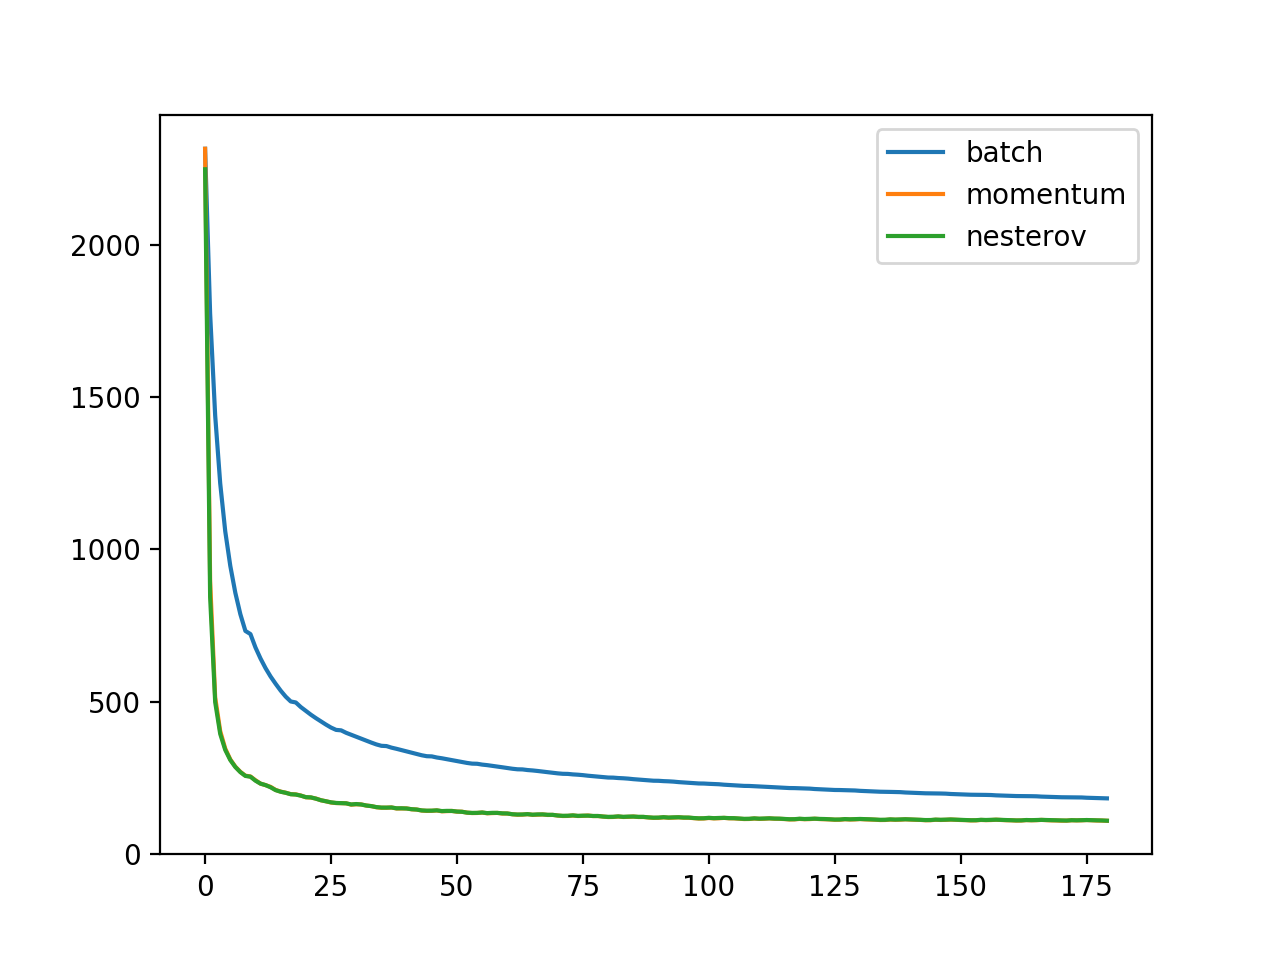

In [94]:
%matplotlib notebook
plt.plot(losses_batch, label="batch")
plt.plot(losses_momentum, label="momentum")
plt.plot(losses_nesterov, label="nesterov")
plt.legend()
plt.show()